In [18]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D #Library to be used for plotting 3D graphs

In [20]:
# We will be using Synthetic Dataset:
N = 1000;
X = np.random.random((N,2))*6 - 3
# random() function returns a uniformly distributed data ranging from -1 to +1. We have '*6 - 3' the random funstions o/p to scale our data in the range of -3 to +3.
# Thus, X is now a 2D data uniformly distributed lying in the range of -3 to +3.
X

array([[-1.56025766,  2.31014087],
       [-1.98932215,  0.00683757],
       [-1.82634963, -0.93557723],
       ...,
       [ 2.93891125, -1.69737501],
       [ 2.77413617, -1.78974539],
       [-2.9425543 ,  1.16228906]])

In [21]:
X.shape

(1000, 2)

In [22]:
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])
Y.shape
# Y is calculated using a random formula, Y = cos(2*X1) + cos(3*X2)

(1000,)

In [23]:
Y[:6]

array([-0.20202518,  0.33013424, -1.81665977, -0.49956161,  0.41803733,
       -0.43708052])

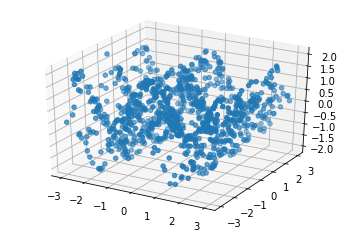

In [24]:
# Plotting a 3D Scatter Plot:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()

In [25]:
# Building our model(Regression Based Model):
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [26]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs = 100)

Epoch 1/100
1000/1000 [==============================] - 0s 260us/sample - loss: 0.9569
Epoch 2/100
1000/1000 [==============================] - 0s 60us/sample - loss: 0.9280
Epoch 3/100
1000/1000 [==============================] - 0s 64us/sample - loss: 0.9023
Epoch 4/100
1000/1000 [==============================] - 0s 67us/sample - loss: 0.8956
Epoch 5/100
1000/1000 [==============================] - 0s 83us/sample - loss: 0.8164
Epoch 6/100
1000/1000 [==============================] - 0s 72us/sample - loss: 0.7764
Epoch 7/100
1000/1000 [==============================] - 0s 79us/sample - loss: 0.7195
Epoch 8/100
1000/1000 [==============================] - 0s 60us/sample - loss: 0.6625
Epoch 9/100
1000/1000 [==============================] - 0s 57us/sample - loss: 0.6220
Epoch 10/100
1000/1000 [==============================] - 0s 64us/sample - loss: 0.5859
Epoch 11/100
1000/1000 [==============================] - 0s 59us/sample - loss: 0.5843
Epoch 12/100
1000/1000 [================

1000/1000 [==============================] - 0s 64us/sample - loss: 0.0168
Epoch 95/100
1000/1000 [==============================] - 0s 58us/sample - loss: 0.0113
Epoch 96/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0099
Epoch 97/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0104
Epoch 98/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0093
Epoch 99/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.0051
Epoch 100/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0083


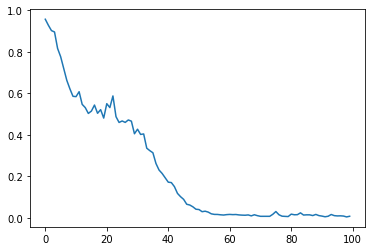

In [27]:
# Plotting Loss per Iteration:
plt.plot(r.history['loss'], label='Loss')

**Observation: The loss has depleted with the increase in number of epochs.**

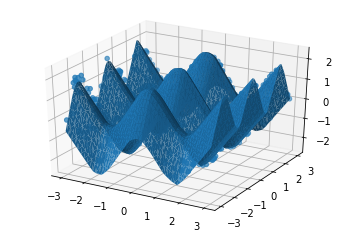

In [28]:
# Plot the Surface Predictions:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

# Surface Plot & Creating Our Test Data:
line = np.linspace(-3,+3,50)
xx,yy = np.meshgrid(line,line)
# xx & yy represents 1st and 2nd axes.
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

# Prediction basis the model we built:
Yhat = model.predict(Xgrid).flatten()
# We flattened the prediction Yhat as the o/p of it was of shape (N,) and we need the o/p to be of the shape (N,1).

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased=True)
plt.show()

**Inference: The above graph clearly illustrates that the Synthetic Train and Test Data are nicely mapped to each other i.e our Neural Network manages to approximate the function Y = cos(2*X1) + cos(3*X2) very well. 

# Lets analyse the models performance when the Test data range is changed (Trying Out Extrapolation):

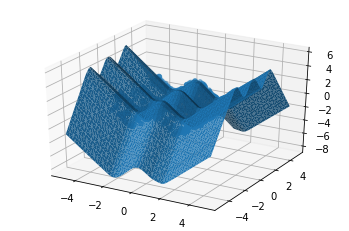

In [29]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y); # Train Data

# surface plot
line = np.linspace(-5, +5, 50) # Changing the Range(Extrapolating)
xx, yy = np.meshgrid(line, line)
# xx and yy represents the 1st and 2nd axes respectively
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

Yhat = model.predict(Xgrid).flatten()
# We flatten this because the output is (N,) and we want it to be (N,1)

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show();

**Observation from Extrapolation:**

**It doesnt work quite well. It assumes that the pattern keeps going in the direction as it was going at the edges.**